# Social Media Analysis HW2

b06207013 心理五 郭芳妤

In [1]:
from numpy import linalg as LA
import random
import pandas as pd
import numpy as np

data = pd.read_csv('adjacent_matrix-1.csv')

In [3]:
# map the name node and index
LEN = len(data)
name_map = []
for i in range(LEN):
    name_map.append(data['Unnamed: 0'][i])

"""build the diagoanl, Laplacian matrix D-mat, L-mat"""

A_mat = np.zeros((LEN, LEN))
D_mat = np.zeros((LEN, LEN))
L_mat = np.zeros((LEN, LEN))

for i in range(LEN):
    for j in range(LEN):
        A_mat[i, j] = data[str(name_map[j])][i]
    
for i in range(LEN):
    D_mat[i, i] = sum(A_mat[i])
    
for i in range(LEN):
    for j in range(LEN):
        L_mat[i, j] = D_mat[i, j] - A_mat[i, j]

### Find top 3 Eigenvectors

In [94]:
# 計算前 3(k) 小的 eigenvectors
k = 3
eigenvalues, eigenvectors = np.linalg.eig(L_mat)

eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)

# 由小到大排列，並回傳其 index
order = np.argsort(eigenvalues)
eigenvalues = eigenvalues[order]
embedding_size = 3 # k value
v_0 = eigenvectors[:, order[0]]

# v: 的每一個row = 每一個角色的 representation vector
v = eigenvectors[:, order[0:(embedding_size)]]

In [148]:
v_top3 = []
for i in range(3):
    v_top3.append(eigenvectors[:, order[i]])

v_top3 = pd.DataFrame(v_top3)
v_top3.to_csv("eigen.csv", header = False, index = False)

### K-means function

In [128]:
def Kmeans(X_hat, k, maxiters = 100, tol = 1e-5):
    N = len(X_hat) # node數(should be 69)
    n = len(X_hat[1]) # dimension(should be 3 = k)
    dist = np.zeros(N)
    reps = [np.zeros(n) for j in range(k)]
    
    # 隨機選擇初始值
    ASS = [random.randrange(3) for i in range(69)]
    Jprevious = float("inf") #用來作為 stopping condition
    
    for ITER in range(maxiters):
        for j in range(k):
            group = [i for i in range(N) if ASS[i] == j]
            reps[j] = sum(X_hat[group]/len(group))
        
        for i in range(N):
            MIN_dist = float("inf")
            for j in range(k):
                if LA.norm(X_hat[i] - reps[j]) < MIN_dist:
                    ASS[i] = j
                    MIN_dist = LA.norm(X_hat[i] - reps[j])
                    dist[i] = MIN_dist
            # (dist[i], ASS[i]) = min([LA.norm(X_hat[i] - reps[j]) for j in range(k)])
        
        J = pow(LA.norm(dist), 2)/N
        print("Iteration =", ITER,": Jclust = ", J)
        if ITER > 1 and abs(J - Jprevious) < tol*J:
            return ASS, reps
        Jprevious = J

In [154]:
ASS, reps = Kmeans(v, 3)

Iteration = 0 : Jclust =  0.026468466849872585
Iteration = 1 : Jclust =  0.016152278494252867
Iteration = 2 : Jclust =  0.013941637750953022
Iteration = 3 : Jclust =  0.013114590346018902
Iteration = 4 : Jclust =  0.01293563206740359
Iteration = 5 : Jclust =  0.01293563206740359


In [161]:
result = []
result.append(ASS)
result_DF = pd.DataFrame(result)
result_DF.to_csv("result.csv", header = False, index = False)

In [166]:
print(ASS)

[1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2]


# Result

Text(0.5, 1.0, 'Clustering Result')

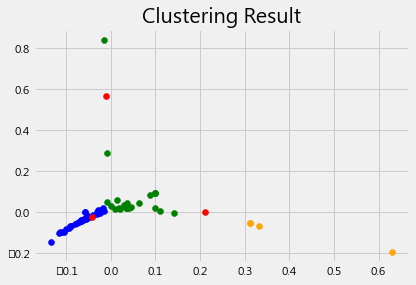

In [167]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

colormap = ['orange', 'blue', 'green']
for i in range(len(ASS)):
    feature = v[i,:][1:]
    label = int(ASS[i])
    plt.scatter(feature[0], feature[1], c = colormap[label])

plt.scatter(centroids[:, 1], centroids[:, 2], c = 'red')
plt.title('Clustering Result')